In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('서울 시군구 연령별 데이터.xlsx')

In [5]:
grouped_df = df.groupby('시군구명')['계'].sum().reset_index()

In [21]:
# 모든 수치형 열을 선택
all_columns = df.select_dtypes(include=[np.number]).columns

# '배출량' 열을 제외한 모든 수치형 열에 대해 합계를 구함
grouped_df = df.groupby('시군구명')[all_columns].sum()

grouped_df = grouped_df.drop(columns=['행정기관코드', '계', '남자', '여자'])

# 결과를 확인
grouped_df.reset_index(inplace=True)

grouped_df.to_excel('서울 시군구 그룹.xlsx')

grouped_df

,시군구명,0세남자,1세남자,2세남자,3세남자,4세남자,5세남자,6세남자,7세남자,8세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
0,강남구,1090,1139,1169,1265,1505,1666,1838,2151,2399,...,18,6,6,4,2,1,2,0,2,1
1,강동구,1100,1294,1395,1342,1530,1603,1715,1929,2079,...,16,12,8,3,2,4,1,1,1,0
2,강북구,402,402,490,519,541,652,678,736,806,...,8,7,4,0,1,0,0,0,1,0
3,강서구,1282,1274,1344,1410,1526,1555,1653,1981,1949,...,16,11,5,4,2,1,2,0,1,1
4,관악구,681,708,731,723,797,857,902,999,1102,...,10,4,3,1,2,0,0,0,0,2
5,광진구,567,618,651,620,747,746,816,971,1057,...,8,2,2,1,3,1,0,1,0,2
6,구로구,944,1068,1032,1062,1118,1191,1184,1308,1353,...,12,4,3,2,0,0,0,0,0,0
7,금천구,476,436,454,456,502,480,529,561,607,...,8,3,1,2,1,2,0,0,0,1
8,노원구,1090,1087,1092,1136,1214,1237,1445,1638,1862,...,15,12,9,1,1,4,0,2,0,0
9,도봉구,478,551,606,582,695,751,806,903,1006,...,8,7,3,1,0,1,0,2,0,3


In [52]:
age_group_df = pd.DataFrame({
'시군구' : ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구',
            '도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구',
            '양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
})
age_group_df['0대 남자'] = grouped_df.loc[:, '0세남자':'9세남자'].sum(axis=1)
age_group_df['10대 남자'] = grouped_df.loc[:, '10세남자':'19세남자'].sum(axis=1)
age_group_df['20대 남자'] = grouped_df.loc[:, '20세남자':'29세남자'].sum(axis=1)
age_group_df['30대 남자'] = grouped_df.loc[:, '30세남자':'39세남자'].sum(axis=1)
age_group_df['40대 남자'] = grouped_df.loc[:, '40세남자':'49세남자'].sum(axis=1)
age_group_df['50대 남자'] = grouped_df.loc[:, '50세남자':'59세남자'].sum(axis=1)
age_group_df['60대 남자'] = grouped_df.loc[:, '60세남자':'69세남자'].sum(axis=1)
age_group_df['70대 남자'] = grouped_df.loc[:, '70세남자':'79세남자'].sum(axis=1)
age_group_df['80대 남자'] = grouped_df.loc[:, '80세남자':'89세남자'].sum(axis=1)
age_group_df['90대 남자'] = grouped_df.loc[:, '90세남자':'99세남자'].sum(axis=1)
age_group_df['0대 여자'] = grouped_df.loc[:, '0세여자':'9세여자'].sum(axis=1)
age_group_df['10대 여자'] = grouped_df.loc[:, '10세여자':'19세여자'].sum(axis=1)
age_group_df['20대 여자'] = grouped_df.loc[:, '20세여자':'29세여자'].sum(axis=1)
age_group_df['30대 여자'] = grouped_df.loc[:, '30세여자':'39세여자'].sum(axis=1)
age_group_df['40대 여자'] = grouped_df.loc[:, '40세여자':'49세여자'].sum(axis=1)
age_group_df['50대 여자'] = grouped_df.loc[:, '50세여자':'59세여자'].sum(axis=1)
age_group_df['60대 여자'] = grouped_df.loc[:, '60세여자':'69세여자'].sum(axis=1)
age_group_df['70대 여자'] = grouped_df.loc[:, '70세여자':'79세여자'].sum(axis=1)
age_group_df['80대 여자'] = grouped_df.loc[:, '80세여자':'89세여자'].sum(axis=1)
age_group_df['90대 여자'] = grouped_df.loc[:, '90세여자':'99세여자'].sum(axis=1)
age_group_df

,시군구,0대 남자,10대 남자,20대 남자,30대 남자,40대 남자,50대 남자,60대 남자,70대 남자,80대 남자,...,0대 여자,10대 여자,20대 여자,30대 여자,40대 여자,50대 여자,60대 여자,70대 여자,80대 여자,90대 여자
0,강남구,16859,32123,31820,36573,45017,42420,28969,17637,6640,...,15859,29344,35646,41702,53315,42497,33424,20761,8148,1660
1,강동구,16067,20519,27180,33863,37128,34630,32065,16904,5440,...,14918,18359,29208,34699,37330,35935,36373,18549,7671,1478
2,강북구,6010,9811,18364,18413,20716,24818,22631,12740,5896,...,5678,9447,20026,16614,19406,25363,25330,16958,8886,1143
3,강서구,15967,21502,36011,48255,43393,40288,37074,20145,6816,...,15403,20397,43510,48494,43215,42710,43406,23257,10958,2054
4,관악구,8566,12808,52199,49477,33213,33645,28452,16913,7234,...,8034,12423,55560,39060,28686,32053,32030,20807,9693,1318
5,광진구,7834,12047,27400,27393,23673,25752,21790,10718,4435,...,7472,11833,31649,27547,24590,27264,23799,12770,6453,1017
6,구로구,11625,14388,24639,31187,29915,30655,27820,15995,6006,...,10959,13892,26444,30010,28672,31179,30963,18409,8466,1264
7,금천구,5090,6560,16952,20822,15906,18814,17935,8838,3372,...,4891,6411,18199,17030,13825,18642,18426,10147,4857,698
8,노원구,13711,24563,33759,30571,36112,41646,33882,17414,7116,...,12881,22866,32809,30444,39602,44690,39276,22195,12483,2156
9,도봉구,7397,11608,18719,19338,21397,25831,24989,13288,5806,...,6905,10811,18814,18298,21250,28331,27990,15591,8734,1393


In [65]:
age_group_df['총 인구수'] = age_group_df[['0대 남자', '10대 남자', '20대 남자', '30대 남자', '40대 남자', '50대 남자', '60대 남자', '70대 남자', '80대 남자', '90대 남자', '0대 여자', '10대 여자', '20대 여자', '30대 여자', '40대 여자', '50대 여자', '60대 여자', '70대 여자', '80대 여자', '90대 여자']].sum(axis=1)
age_group_df

,시군구,0대 남자,10대 남자,20대 남자,30대 남자,40대 남자,50대 남자,60대 남자,70대 남자,80대 남자,...,40대 여자,50대 여자,60대 여자,70대 여자,80대 여자,90대 여자,총 인구수,10대,20대,30대
0,강남구,16859,32123,31820,36573,45017,42420,28969,17637,6640,...,53315,42497,33424,20761,8148,1660,541038,61467,67466,78275
1,강동구,16067,20519,27180,33863,37128,34630,32065,16904,5440,...,37330,35935,36373,18549,7671,1478,458746,38878,56388,68562
2,강북구,6010,9811,18364,18413,20716,24818,22631,12740,5896,...,19406,25363,25330,16958,8886,1143,288687,19258,38390,35027
3,강서구,15967,21502,36011,48255,43393,40288,37074,20145,6816,...,43215,42710,43406,23257,10958,2054,563495,41899,79521,96749
4,관악구,8566,12808,52199,49477,33213,33645,28452,16913,7234,...,28686,32053,32030,20807,9693,1318,482638,25231,107759,88537
5,광진구,7834,12047,27400,27393,23673,25752,21790,10718,4435,...,24590,27264,23799,12770,6453,1017,335813,23880,59049,54940
6,구로구,11625,14388,24639,31187,29915,30655,27820,15995,6006,...,28672,31179,30963,18409,8466,1264,392919,28280,51083,61197
7,금천구,5090,6560,16952,20822,15906,18814,17935,8838,3372,...,13825,18642,18426,10147,4857,698,227670,12971,35151,37852
8,노원구,13711,24563,33759,30571,36112,41646,33882,17414,7116,...,39602,44690,39276,22195,12483,2156,498895,47429,66568,61015
9,도봉구,7397,11608,18719,19338,21397,25831,24989,13288,5806,...,21250,28331,27990,15591,8734,1393,307008,22419,37533,37636


In [73]:
age_group_sum_df = pd.DataFrame({
'시군구' : ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구',
            '도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구',
            '양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
})


age_group_sum_df['10대'] = age_group_df['10대 남자'] + age_group_df['10대 여자']
age_group_sum_df['20대'] = age_group_df['20대 남자'] + age_group_df['20대 여자']
age_group_sum_df['30대'] = age_group_df['30대 남자'] + age_group_df['30대 여자']
age_group_sum_df['40대'] = age_group_df['40대 남자'] + age_group_df['40대 여자']
age_group_sum_df['50대'] = age_group_df['50대 남자'] + age_group_df['50대 여자']
age_group_sum_df['60대'] = age_group_df['60대 남자'] + age_group_df['60대 여자']
age_group_sum_df['70대'] = age_group_df['70대 남자'] + age_group_df['70대 여자']
age_group_sum_df['80대'] = age_group_df['80대 남자'] + age_group_df['80대 여자']
age_group_sum_df

age_group_sum_df.to_excel('서울 시군구 연령대 통합.xlsx')
age_group_sum_df

,시군구,10대,20대,30대,40대,50대,60대,70대,80대
0,강남구,61467,67466,78275,98332,84917,62393,38398,14788
1,강동구,38878,56388,68562,74458,70565,68438,35453,13111
2,강북구,19258,38390,35027,40122,50181,47961,29698,14782
3,강서구,41899,79521,96749,86608,82998,80480,43402,17774
4,관악구,25231,107759,88537,61899,65698,60482,37720,16927
5,광진구,23880,59049,54940,48263,53016,45589,23488,10888
6,구로구,28280,51083,61197,58587,61834,58783,34404,14472
7,금천구,12971,35151,37852,29731,37456,36361,18985,8229
8,노원구,47429,66568,61015,75714,86336,73158,39609,19599
9,도봉구,22419,37533,37636,42647,54162,52979,28879,14540


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = pd.read_excel('서울 시군구 연령대 통합.xlsx')
df = pd.DataFrame(data)

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # "Unnamed"를 포함하는 열을 제거합니다.

# 표준화하지 않을 열 선택
non_standard_columns = ['시군구']

# 표준화할 열 선택
standard_columns = df.columns.difference(non_standard_columns)

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화 (전치 후 표준화하고 다시 전치)
df_scaled = pd.DataFrame(scaler.fit_transform(df[standard_columns].T).T, columns=standard_columns)

# 표준화하지 않은 열을 표준화된 데이터프레임에 다시 추가
df_scaled[non_standard_columns] = df[non_standard_columns]

# 결과 확인 및 엑셀로 저장
df_scaled.to_excel('표준화_인구.xlsx', index=False)


In [84]:
watse_data = pd.read_excel('서울 시군구별 쓰레기 배출.xlsx')
watse_data_new = pd.merge(watse_data,age_group_df, how = 'left', on='시군구')

In [86]:

watse_data_new .to_excel('표준화.xlsx')

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 예제 데이터 프레임 생성
data = pd.read_excel('시군구별 1인당 쓰레기 배출량.xlsx')
df = pd.DataFrame(data)

# 표준화하지 않을 열 선택 (예: 'ID')
non_standard_columns = ['시군구']

# 표준화할 열 선택
standard_columns = df.columns.difference(non_standard_columns)

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
df_scaled = pd.DataFrame(scaler.fit_transform(df[standard_columns]), columns=standard_columns)

# 표준화하지 않은 열을 표준화된 데이터프레임에 다시 추가
df_scaled = pd.concat([df[non_standard_columns], df_scaled], axis=1)

# 결과 확인
df_scaled
df_scaled.to_excel('표준화.xlsx')

In [90]:
df_scaled

,시군구,pet병,가연성 종량제,고철류,금속캔,발포수지류,불연성 종량제,비닐류,음식물폐기물,폐유리병류,폐의류,폐전기전자제품,폐지류
0,강남구,0.559659,0.244922,0.926099,1.951440,0.272316,0.383836,-0.113295,1.546362,0.666764,0.314320,-0.370778,2.693760
1,강동구,1.712149,-0.768775,-0.585760,0.122378,0.465005,-0.661073,0.939440,-0.131115,-0.249841,-0.256521,-1.091892,-0.066532
2,강북구,-0.284235,-0.102580,0.509840,-1.881930,-0.771526,-0.423954,-1.100461,-0.414511,-0.487118,-0.089168,-0.618021,-1.217927
3,강서구,-1.098426,-0.524649,0.939202,-0.608339,-0.461009,-0.353996,-1.498945,-0.473383,-0.900575,-0.871775,-0.984423,-0.044070
4,관악구,1.427691,-0.521314,-1.192338,0.459853,-0.965989,-0.579147,0.541864,-0.786982,1.901406,-1.568258,1.109866,-0.618621
5,광진구,-0.332589,-0.487652,-1.242002,-0.563737,-0.765592,-0.584617,-0.189932,-0.363236,-0.520263,0.137588,0.914625,-1.853155
6,구로구,-0.100933,0.100350,0.493399,-0.171019,-0.564824,0.121164,-0.892311,-0.711922,-0.817142,0.317383,-0.984360,-0.283686
7,금천구,-0.635818,0.196520,-1.128813,-0.816456,-0.603362,0.337526,-0.528802,-0.232431,-0.885820,0.777987,1.962483,-1.255106
8,노원구,-0.966697,-0.628184,1.516433,-0.193101,-0.283745,-0.648210,-0.745778,-0.387862,2.687744,1.562788,-0.955369,1.182784
9,도봉구,-1.541178,-0.502695,2.077755,-1.232228,-0.537423,-0.647542,-0.612600,-0.307308,-0.917719,-0.901245,-0.238210,-0.530505


C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

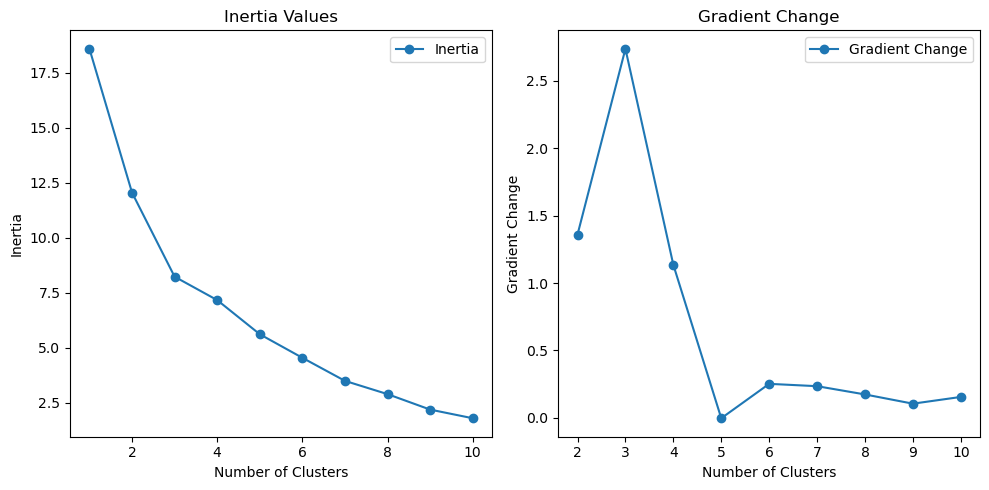

Elbow Point (Gradient Change): 3 clusters


In [81]:
#Elbow Method 로 최적 클러스터 수 결정
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_sejong_select = pd.read_excel('표준화_인구.xlsx')
cluster = df_sejong_select
columns_to_exclude = ['시군구']
cluster_data = cluster.drop(columns=columns_to_exclude)
inertia_values = []
cluster_range = range(1, 11)

# 각 클러스터 개수에 대해 KMeans 모델 훈련 및 Inertia 값 저장
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=16)
    kmeans.fit(cluster_data)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 시각화
plt.figure(figsize=(10, 5))

# Inertia 그래프
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o', label='Inertia')
plt.title('Inertia Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()

# 그래디언트 값 계산
gradient = np.gradient(inertia_values)

# 그래디언트의 변화율 계산
gradient_change = np.diff(gradient)

# 그래디언트 변화율 그래프
plt.subplot(1, 2, 2)
plt.plot(cluster_range[1:], gradient_change, marker='o', label='Gradient Change')
plt.title('Gradient Change')
plt.xlabel('Number of Clusters')
plt.ylabel('Gradient Change')
plt.legend()

plt.tight_layout()
plt.show()

# 그래디언트 변화율이 큰 지점 찾기
elbow_point = np.argmax(gradient_change)

# Elbow Point 출력
print(f'Elbow Point (Gradient Change): {cluster_range[elbow_point+1]} clusters')

C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\youmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

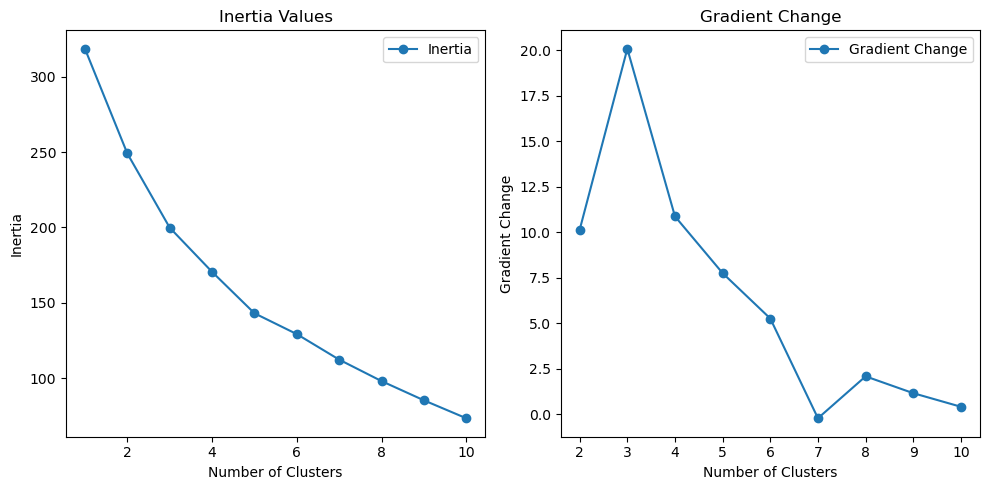

Elbow Point (Gradient Change): 3 clusters


In [91]:
#Elbow Method 로 최적 클러스터 수 결정
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_sejong_select = pd.read_excel('표준화.xlsx')
cluster = df_sejong_select
columns_to_exclude = ['시군구']
cluster_data = cluster.drop(columns=columns_to_exclude)
inertia_values = []
cluster_range = range(1, 11)

# 각 클러스터 개수에 대해 KMeans 모델 훈련 및 Inertia 값 저장
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=16)
    kmeans.fit(cluster_data)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 시각화
plt.figure(figsize=(10, 5))

# Inertia 그래프
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o', label='Inertia')
plt.title('Inertia Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()

# 그래디언트 값 계산
gradient = np.gradient(inertia_values)

# 그래디언트의 변화율 계산
gradient_change = np.diff(gradient)

# 그래디언트 변화율 그래프
plt.subplot(1, 2, 2)
plt.plot(cluster_range[1:], gradient_change, marker='o', label='Gradient Change')
plt.title('Gradient Change')
plt.xlabel('Number of Clusters')
plt.ylabel('Gradient Change')
plt.legend()

plt.tight_layout()
plt.show()

# 그래디언트 변화율이 큰 지점 찾기
elbow_point = np.argmax(gradient_change)

# Elbow Point 출력
print(f'Elbow Point (Gradient Change): {cluster_range[elbow_point+1]} clusters')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 예제 데이터 프레임 생성
data = pd.read_excel('쓰레기 배출 지표.xlsx')
df = pd.DataFrame(data)

# 표준화하지 않을 열 선택 (예: 'ID')
non_standard_columns = ['시군구']

# 표준화할 열 선택
standard_columns = df.columns.difference(non_standard_columns)

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
df_scaled = pd.DataFrame(scaler.fit_transform(df[standard_columns]), columns=standard_columns)

# 표준화하지 않은 열을 표준화된 데이터프레임에 다시 추가
df_scaled = pd.concat([df[non_standard_columns], df_scaled], axis=1)

# 결과 확인
df_scaled
df_scaled.to_excel('쓰레기 배출 지표 표준화.xlsx')